In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__

'0.15.0'

In [2]:
# The following is a bunch of code to make data presentation simple.  Skip it for reading.
import sys
sys.path.append("..")
from timetable import TimeTable

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

In [3]:
# Data exported from https://ncsesdata.nsf.gov/ids/ipeds_c

raw_EECS = Table().read_table("./IPEDS_C_Inst_CIP_Deg.csv")
raw_EECS.relabel('[Award Level Code]', 'Award')
raw_EECS.relabel('[CIP Code and Description (4 digit)]', 'CIP')
raw_EECS.relabel('[Institution Name]', 'Institution')
raw_EECS

Award                              | CIP                                                | Institution                       | 2017  | 2016  | 2015  | 2014  | 2013  | 2012  | 2011  | 2010  | 2009  | 2008  | 2007  | 2006  | 2005  | 2004  | 2003  | 2002  | 2001  | 2000  | 1999  | 1998  | 1997
Award of less than 1 academic year | Total for selected values                          | Total for selected values         | 9,338 | 8,677 | 8,663 | 7,601 | 4,957 | 3,708 | 3,543 | 3,132 | 3,030 | 2,998 | 2,725 | 3,288 | 3,565 | 4,493 | 5,253 | 7,006 | 6,953 | 6,115 | 3,921 | 1,938 | 5,258
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Total for selected values         | 8,478 | 7,709 | 7,622 | 6,437 | 4,186 | 3,032 | 2,960 | 2,618 | 2,678 | 2,713 | 2,453 | 2,979 | 3,206 | 4,158 | 4,309 | 5,710 | 6,193 | 5,292 | 3,333 | 1,608 | 4,837
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | ABCO Technology                   | -     | -     | 15    | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Academy Education Services        | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | 4     | 19    | 22    | 38    | -     | -     | -     | -     | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Academy of Careers and Technology | -     | -     | -     | -     | -     | -     | 8     | 2     | -     | 8     | 25    | 14    | 58    | 74    | 46    | 52    | 48    | 60    | 91    | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Advanced College of Technology    | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | 15    | -     | -     | -     | -     | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Advanced Training Associates      | 22    | 16    | 24    | 28    | 28    | 21    | 19    | 20    | 5     | 6     | 3     | 1     | 1     | 1     | -     | -     | -     | -     | -     | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Aims Community College            | 16    | 16    | 11    | 16    | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Alamance Community College        | 35    | 19    | 5     | 5     | 5     | 5     | 2     | 4     | 4     | 3     | 1     | 1     | 5     | -     | -     | -     | -     | -     | -     | -     | -
Award of less than 1 academic year | 11.01 - Computer And Information Sciences, General | Allan Hancock College             | 2     | -     | 1     | -     | -     | 1     | -     | -     | 14    | 5     | 8     | 10    | 16    | 4     | -     | -     | -     | -     | -     | -     | -
... (10208 rows omitted)

In [4]:
# CIP codes for exported data
for i in np.unique(raw_EECS['CIP']) :
    print(i)

11.01 - Computer And Information Sciences, General
11.04 - Information Science/Studies
11.07 - Computer Science
14.09 - Computer Engineering
14.10 - Electrical, Electronics And Communications Engineering
Total for selected values


In [5]:
# Number of Institutions Repreesented
len(np.unique(raw_EECS['Institution']))

3313

In [6]:
raw_EE = raw_EECS.where('CIP', "14.10 - Electrical, Electronics And Communications Engineering")
raw_info = raw_EECS.where('CIP', "11.04 - Information Science/Studies")
raw_CS = raw_EECS.where(raw_EECS['CIP'] != "14.10 - Electrical, Electronics And Communications Engineering")
raw_CS = raw_CS.where(raw_CS['CIP'] != "11.04 - Information Science/Studies")

In [7]:
raw_EECS.where('Institution', "University of California-Berkeley").drop('Institution').move_to_start('CIP').show()

In [8]:
# Number of Institutions Repreesented
len(np.unique(raw_CS['Institution'])), len(np.unique(raw_EE['Institution']))

(3092, 508)

In [9]:
# Example test case
raw_CS.where('Institution', "University of California-Berkeley").show()

In [10]:
raw_EE.where('Institution', "University of California-Berkeley").show()

In [11]:
def map_degree(deg):
    if deg in ['Total for selected values'] :
        return 'Total'
    elif deg in ["Associate's degree",
                 'Award of at least 2 but less than 4 academic years' ] :
        return 'AA'
    elif deg in ["Bachelor's degree"] :
        return 'BA' 
    elif deg in ["Master's degree"] :
        return 'MS'
    elif deg in ["Doctor's degree - research/scholarship",
                 "Doctor's degree (old degree classification)"] :
        return 'PhD'
    elif deg in ["Doctor's degree - other",] :
        return 'Other-Doc'
    else :
        return 'other'
    
def valtoint(x):
    try :
        return int(x.replace(",", ""))
    except :
        return 0
    
def valstoints(tbl, keys):
    vtbl = type(tbl)()
    for key in keys:
        vtbl[key] = tbl[key]
    for lbl in tbl.labels :
        if lbl not in keys :
            vtbl[lbl] = tbl.apply(valtoint, lbl)
    return vtbl

def dropsuffix(tbl, suffix):
    for lbl in tbl.labels :
        tbl.relabel(lbl, lbl.replace(suffix, ""))
        
def xpose_time(tbl, key, time_label='Year'):
    new_labels = [time_label] + list(tbl[key])
    times = sorted( [t for t in tbl.labels if t != key] )
    xtbl = Table(new_labels)
    for tlbl in times:
        xtbl = xtbl.with_row([int(tlbl)] + list( tbl[tlbl]))
    return TimeTable().from_table(xtbl, time_label)

In [12]:
# Convert all the counts to numeric, with 0 for blanks

all_CS = valstoints(raw_CS, raw_CS.labels[0:3])
all_CS['Degree'] = all_CS.apply(map_degree, 0)
all_CS = all_CS.drop('Award').move_column('Degree', 0)

all_EE = valstoints(raw_EE, raw_EE.labels[0:3])
all_EE['Degree'] = all_EE.apply(map_degree, 0)
all_EE = all_EE.drop('Award').move_column('Degree', 0)

In [13]:
Total_CS = all_CS.where('Institution', 'Total for selected values').drop('Institution')
Total_CS = Total_CS.where('CIP', "Total for selected values").drop('CIP').group('Degree', sum)
dropsuffix(Total_CS, " sum")
Total_CS

Degree    | 2017  | 2016  | 2015  | 2014  | 2013  | 2012  | 2011  | 2010  | 2009  | 2008  | 2007  | 2006  | 2005  | 2004  | 2003  | 2002  | 2001  | 2000  | 1999  | 1998  | 1997
AA        | 13586 | 12700 | 12297 | 11866 | 11176 | 11426 | 12070 | 11221 | 10819 | 10716 | 9683  | 10621 | 11557 | 17892 | 18518 | 16323 | 13421 | 9316  | 7209  | 6344  | 5091
BA        | 84279 | 74970 | 66595 | 60067 | 53973 | 50220 | 47535 | 45799 | 46009 | 44589 | 52044 | 58247 | 65350 | 70342 | 69190 | 63102 | 57932 | 52399 | 44625 | 42124 | 40060
MS        | 57617 | 53123 | 42242 | 33693 | 31683 | 31183 | 29692 | 27673 | 28388 | 25886 | 23810 | 25025 | 27231 | 29648 | 27219 | 22607 | 23164 | 21317 | 19535 | 18680 | 16797
Other-Doc | 51    | 44    | 51    | 53    | 23    | 10    | 9     | 23    | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0
PhD       | 4534  | 4489  | 4534  | 4539  | 4221  | 4126  | 3884  | 3692  | 3619  | 3917  | 3907  | 3459  | 2850  | 2497  | 2179  | 2064  | 2244  | 2246  | 2211  | 2420  | 2450
other     | 12206 | 11505 | 11582 | 10945 | 8223  | 6342  | 6697  | 5286  | 4948  | 4743  | 4481  | 5631  | 7026  | 9646  | 10551 | 13049 | 13277 | 10889 | 7346  | 3684  | 6746

In [14]:
Total_EE = all_EE.where('Institution', 'Total for selected values').drop('Institution')
Total_EE = Total_EE.drop('CIP').group('Degree', sum)
dropsuffix(Total_EE, " sum")
Total_EE

Degree    | 2017  | 2016  | 2015  | 2014  | 2013  | 2012  | 2011  | 2010  | 2009  | 2008  | 2007  | 2006  | 2005  | 2004  | 2003  | 2002  | 2001  | 2000  | 1999  | 1998  | 1997
AA        | 285   | 293   | 247   | 242   | 142   | 166   | 158   | 195   | 207   | 197   | 255   | 235   | 277   | 272   | 241   | 105   | 250   | 295   | 390   | 474   | 342
BA        | 17162 | 15989 | 14871 | 14101 | 13114 | 12385 | 11798 | 11715 | 11913 | 12660 | 13412 | 14254 | 14468 | 14467 | 13906 | 13374 | 13342 | 13159 | 12834 | 13206 | 13583
MS        | 12947 | 13915 | 12023 | 10000 | 9636  | 9906  | 9921  | 9311  | 9472  | 8750  | 7859  | 8282  | 9139  | 9566  | 7693  | 6629  | 6864  | 7029  | 6750  | 6813  | 6403
Other-Doc | 1     | 1     | 3     | 1     | 2     | 1     | 3     | 2     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0
PhD       | 2298  | 2249  | 2320  | 2313  | 2132  | 2128  | 2039  | 1873  | 1819  | 2006  | 2048  | 1863  | 1567  | 1440  | 1256  | 1235  | 1417  | 1392  | 1309  | 1471  | 1512
other     | 497   | 493   | 464   | 379   | 280   | 275   | 198   | 186   | 145   | 107   | 75    | 81    | 82    | 81    | 90    | 165   | 79    | 150   | 166   | 179   | 136

In [15]:
# Transpose into timeseries to get national aggregate picture
CS_by_year = xpose_time(Total_CS, 'Degree', 'Year')
EE_by_year = xpose_time(Total_EE, 'Degree', 'Year')

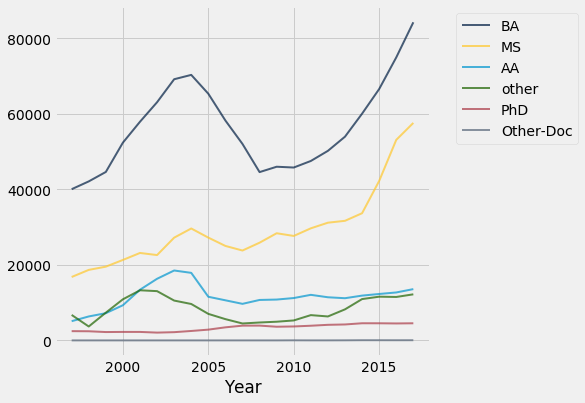

In [16]:
# CS Degrees nationwide
CS_by_year.oplot(height = 6)

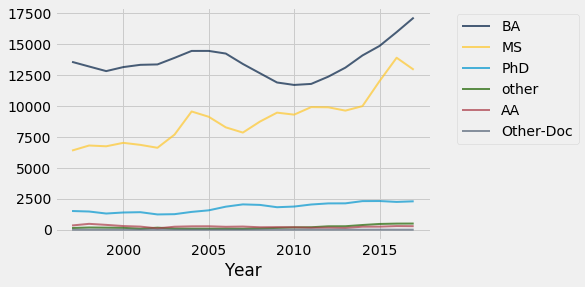

In [17]:
# EE Degrees nationwide
EE_by_year.oplot()

In [18]:
Doctorates = CS_by_year.select(["Year", "PhD", "Other-Doc"])
Doctorates = Doctorates.join("Year", EE_by_year.select(["Year", "PhD", "Other-Doc"]))
Doctorates.relabel('PhD', 'PhD CS')
Doctorates.relabel('PhD_2', 'PhD EE')
Doctorates.show()

In [19]:
#all_CS

In [20]:
# Instutional data 
CS_inst = all_CS.where(all_CS['Institution'] != "Total for selected values")
CS_inst = CS_inst.drop('CIP').groups(['Degree', 'Institution'], sum)
dropsuffix(CS_inst, " sum")                                                                  
EE_inst = all_EE.where(all_EE['Institution'] != "Total for selected values")
EE_inst = EE_inst.drop('CIP').groups(['Degree', 'Institution'], sum)
dropsuffix(EE_inst, " sum")    

In [21]:
CS_inst

Degree | Institution                          | 2017 | 2016 | 2015 | 2014 | 2013 | 2012 | 2011 | 2010 | 2009 | 2008 | 2007 | 2006 | 2005 | 2004 | 2003 | 2002 | 2001 | 2000 | 1999 | 1998 | 1997
AA     | AIB College of Business              | 0    | 0    | 0    | 2    | 1    | 3    | 1    | 4    | 18   | 6    | 13   | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0
AA     | ASA College                          | 48   | 45   | 34   | 34   | 33   | 29   | 18   | 16   | 15   | 21   | 25   | 26   | 62   | 90   | 134  | 177  | 679  | 0    | 0    | 0    | 0
AA     | Aaniiih Nakoda College               | 3    | 0    | 4    | 2    | 1    | 1    | 2    | 4    | 1    | 4    | 3    | 5    | 0    | 1    | 0    | 0    | 0    | 0    | 0    | 0    | 0
AA     | Abraham Baldwin Agricultural College | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 1    | 0    | 2    | 3    | 3    | 3    | 4    | 0    | 0    | 0    | 0    | 0    | 0    | 0
AA     | Academy College                      | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 56   | 42
AA     | Adirondack Community College         | 19   | 13   | 21   | 9    | 11   | 6    | 4    | 4    | 2    | 5    | 5    | 8    | 10   | 10   | 6    | 8    | 10   | 10   | 11   | 11   | 7
AA     | Advanced Training Associates         | 5    | 5    | 8    | 12   | 7    | 5    | 2    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0
AA     | Aims Community College               | 9    | 12   | 6    | 10   | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0
AA     | Alabama Southern Community College   | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 2
AA     | Alamance Community College           | 7    | 17   | 7    | 13   | 14   | 3    | 10   | 6    | 8    | 3    | 3    | 10   | 10   | 0    | 0    | 0    | 0    | 0    | 0    | 0    | 0
... (5029 rows omitted)

In [22]:
CS_BA_inst = CS_inst.where('Degree', "BA").drop('Degree')
EE_BA_inst = EE_inst.where('Degree', "BA").drop('Degree')
CS_MS_inst = CS_inst.where('Degree', "MS").drop('Degree')
EE_MS_inst = EE_inst.where('Degree', "MS").drop('Degree')
CS_PhD_inst = CS_inst.where('Degree', "PhD").drop('Degree')
EE_PhD_inst = EE_inst.where('Degree', "PhD").drop('Degree')

In [23]:
CS_BA_by_year = xpose_time(CS_BA_inst, 'Institution', 'Year')
CS_BA_by_year.order_cols().show()

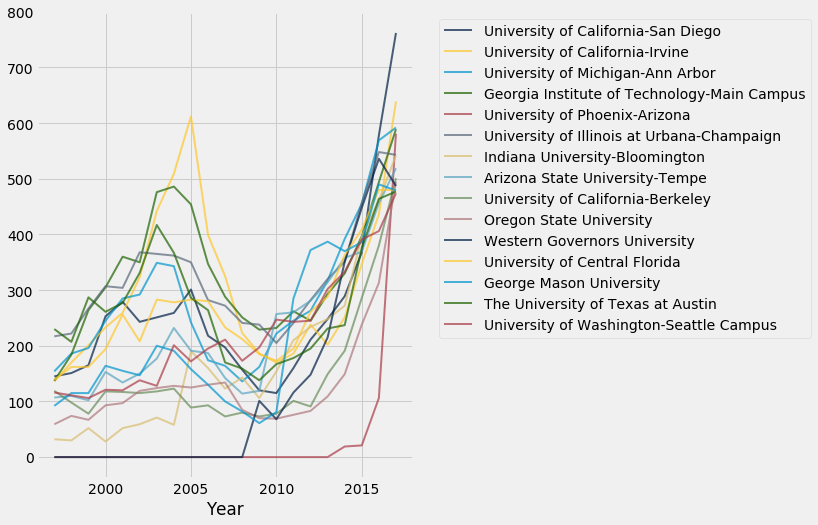

In [24]:
CS_BA_by_year.top(15).oplot(height=8)

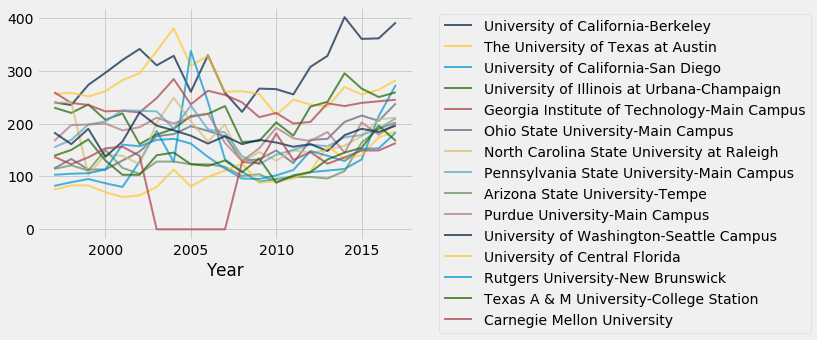

In [25]:
EE_BA_by_year = xpose_time(EE_BA_inst, 'Institution', 'Year')
EE_BA_by_year.top(15).oplot()

In [26]:
BA_by_year = CS_BA_by_year.add_table(EE_BA_by_year)

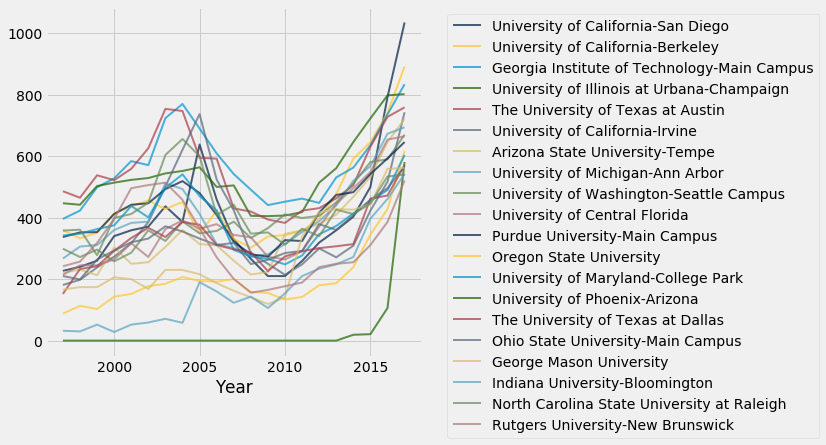

In [27]:
BA_by_year.top(20).oplot(height=6)

In [28]:
BA_by_year.after(2009).order_cols()

Year | University of California-San Diego | University of California-Berkeley | Georgia Institute of Technology-Main Campus | University of Illinois at Urbana-Champaign | The University of Texas at Austin | University of California-Irvine | Arizona State University-Tempe | University of Michigan-Ann Arbor | University of Washington-Seattle Campus | University of Central Florida | Purdue University-Main Campus | Oregon State University | University of Maryland-College Park | University of Phoenix-Arizona | The University of Texas at Dallas | Ohio State University-Main Campus | George Mason University | Indiana University-Bloomington | North Carolina State University at Raleigh | Rutgers University-New Brunswick | Florida International University | University of Minnesota-Twin Cities | Western Governors University | San Jose State University | California Polytechnic State University-San Luis Obispo | Virginia Polytechnic Institute and State University | University of California-Santa Cruz | University of Maryland-University College | Pennsylvania State University-Main Campus | Rochester Institute of Technology | Cornell University | Colorado Technical University-Colorado Springs | Florida State University | Massachusetts Institute of Technology | California State Polytechnic University-Pomona | Texas A & M University-College Station | University of North Carolina at Charlotte | University of Wisconsin-Madison | Brigham Young University-Provo | Iowa State University | University of California-Davis | Georgia State University | New Jersey Institute of Technology | New York University | University of South Florida-Main Campus | University of California-Los Angeles | Kennesaw State University | Stanford University | Carnegie Mellon University | University of Florida | California State University-Long Beach | Drexel University | California State University-Northridge | Northeastern University | Texas State University | Southern New Hampshire University | University of Massachusetts-Amherst | University of Arizona | University of Cincinnati-Main Campus | Stony Brook University | California State University-Sacramento | Rensselaer Polytechnic Institute | Michigan State University | Temple University | University of Southern California | University of Colorado Boulder | University of Pittsburgh-Pittsburgh Campus | Boston University | University of Washington-Tacoma Campus | Missouri University of Science and Technology | Colorado State University-Global Campus | Washington State University | University at Buffalo | University of Illinois at Chicago | Oklahoma State University-Main Campus | University of Connecticut | The University of Texas at San Antonio | University of Missouri-Columbia | University of South Carolina-Columbia | Clemson University | California State University-Fullerton | Worcester Polytechnic Institute | Florida Atlantic University | San Diego State University | University of Washington-Bothell Campus | University of Maryland-Baltimore County | University of North Texas | University of Virginia-Main Campus | Binghamton University | Columbia University in the City of New York | Brigham Young University-Idaho | University of Massachusetts-Lowell | Duke University | San Francisco State University | University of Kentucky | The University of Texas at Arlington | Towson University | SUNY at Albany | University of Georgia | University of Nevada-Reno | California State University-Los Angeles | Michigan Technological University | University of California-Santa Barbara | University of Utah | Illinois Institute of Technology | Oakland University | University of Houston | University of Nebraska-Lincoln | CUNY City College | Southern Illinois University-Edwardsville | University of Alabama in Huntsville | University of Iowa | Portland State University | Kaplan University-Davenport Campus | University of California-Riverside | The University of West Florida | University of Pennsylvania | University of North Carolina at Chapel Hill

In [29]:
CS_MS_by_year = xpose_time(CS_MS_inst, 'Institution', 'Year')
EE_MS_by_year = xpose_time(EE_MS_inst, 'Institution', 'Year')
MS_by_year = CS_MS_by_year.add_table(EE_MS_by_year)

In [30]:
#MS_by_year.order_cols().show()

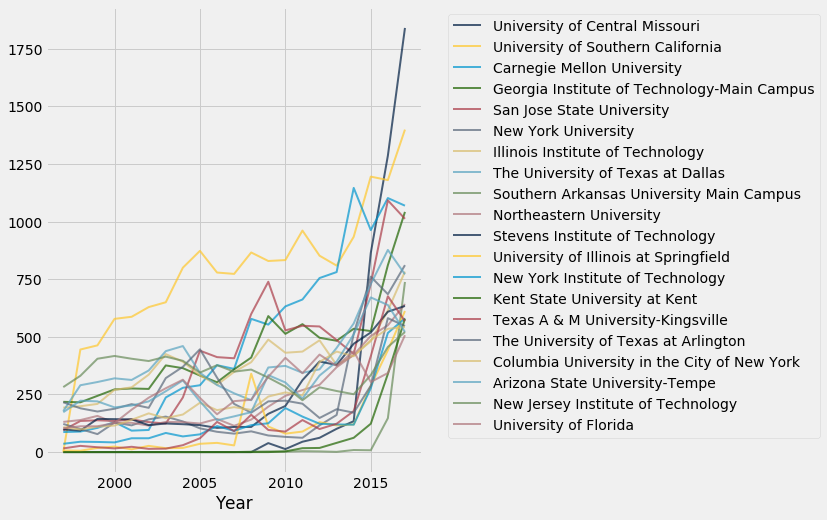

In [31]:
MS_by_year.order_cols().top(20).oplot(height=8)

In [32]:
CS_PhD_by_year = xpose_time(CS_PhD_inst, 'Institution', 'Year')
EE_PhD_by_year = xpose_time(EE_PhD_inst, 'Institution', 'Year')

In [33]:
PhD_by_year = CS_PhD_by_year.add_table(EE_PhD_by_year)

In [34]:
CS_PhD_by_year.order_cols().show()

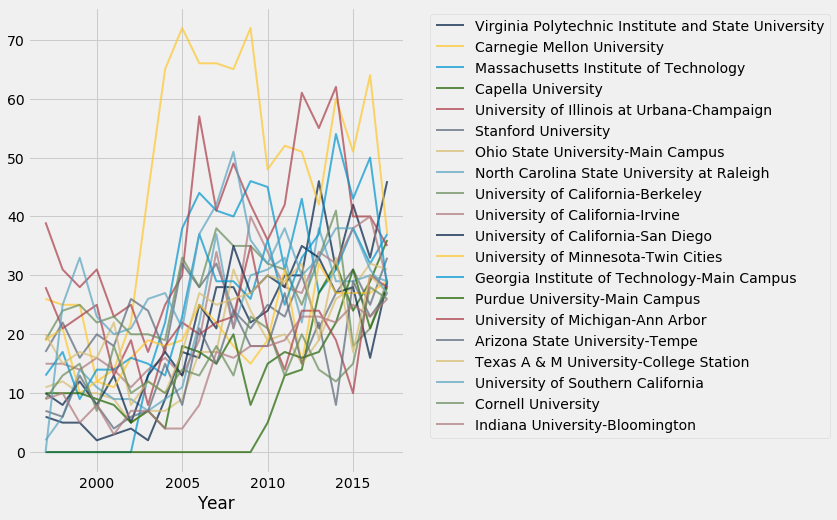

In [35]:
CS_PhD_by_year.top(20).oplot(height=8)

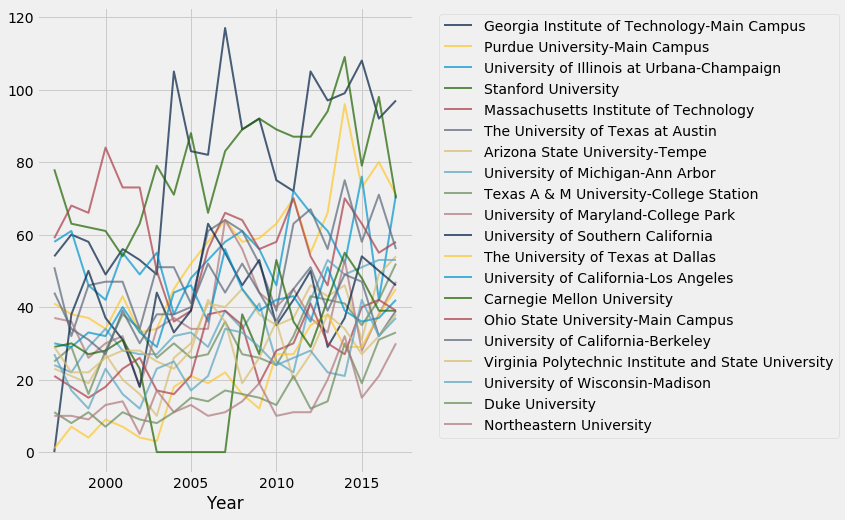

In [36]:
EE_PhD_by_year.top(20).oplot(height=8)

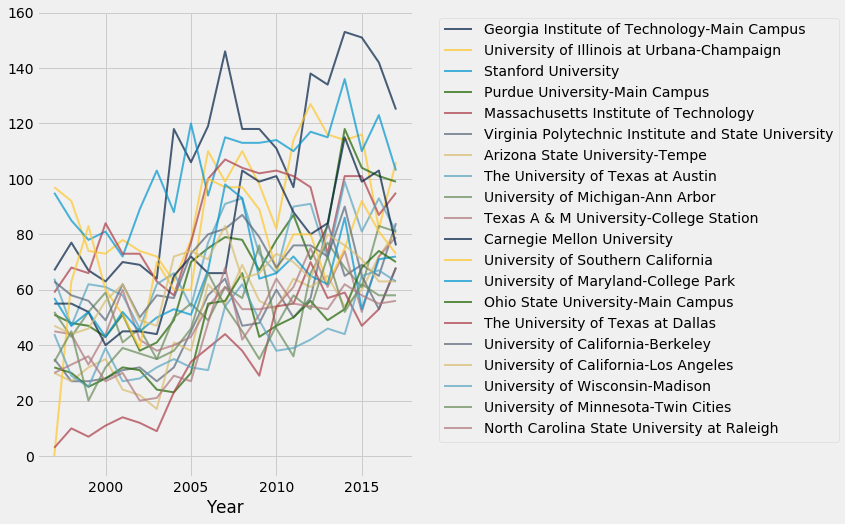

In [37]:
PhD_by_year.top(20).oplot(height=8)

In [38]:
def deg_by_time(inst):
    this_CS = CS_inst.where('Institution', inst).drop('Institution')
    this_CS = this_CS.where(this_CS['Degree'] != 'other')
    this_CS_by_year = xpose_time(this_CS, 'Degree', 'Year')
    this_EE = EE_inst.where('Institution', inst).drop('Institution')
    this_EE = this_EE.where(this_EE['Degree'] != 'other')
    this_EE_by_year = xpose_time(this_EE, 'Degree', 'Year')
    this = this_CS_by_year.join('Year', this_EE_by_year)
    for deg in ('BA', 'MS', 'PhD'):
        this.relabel(deg, deg+"_CS")
        this.relabel(deg+"_2", deg+"_EE")
        this[deg] = this[deg+"_CS"]+this[deg+"_EE"]
    return this

def deg_plot(inst) :
    degs = deg_by_time(inst)
    degs.oplot(height=5)
    _ = plots.title(inst, size=12)
    

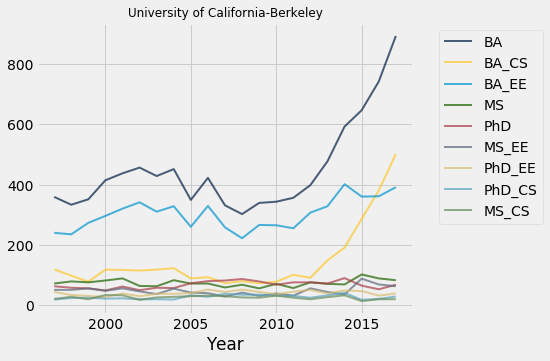

In [39]:
deg_plot("University of California-Berkeley")

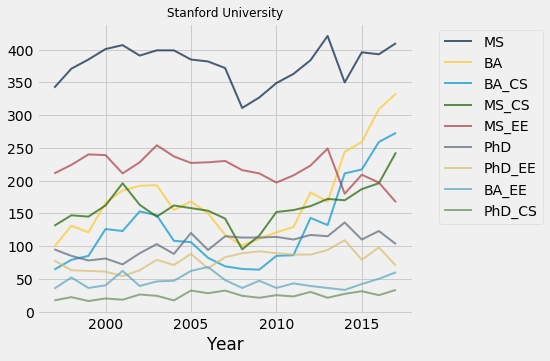

In [40]:
deg_plot("Stanford University")

In [41]:
instlist = [
    "University of California-Berkeley",
    "Stanford University",
    "Massachusetts Institute of Technology",
    "Carnegie Mellon University",
    "Georgia Institute of Technology-Main Campus",
    "University of Illinois at Urbana-Champaign",
    "University of Michigan-Ann Arbor",
    "University of California-Los Angeles",
    "University of California-San Diego",
    "University of Washington-Seattle Campus",
    "The University of Texas at Austin"
]


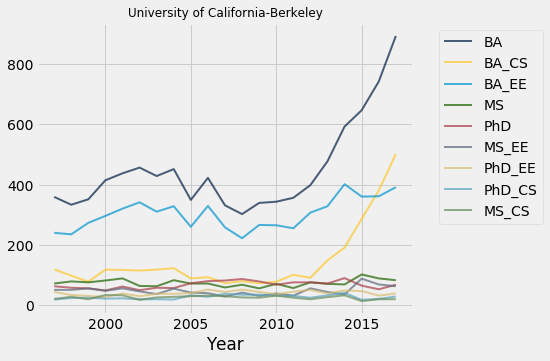

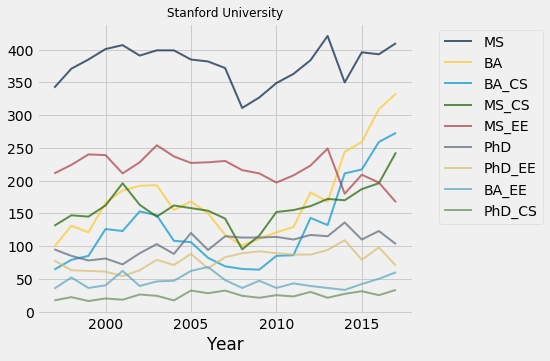

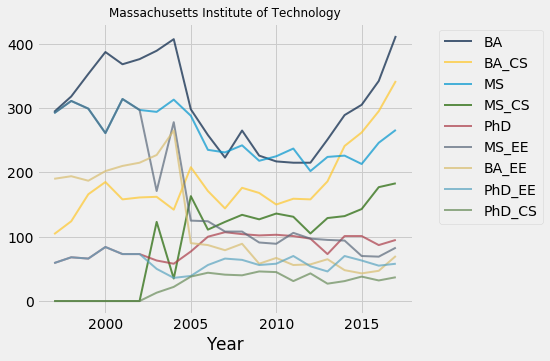

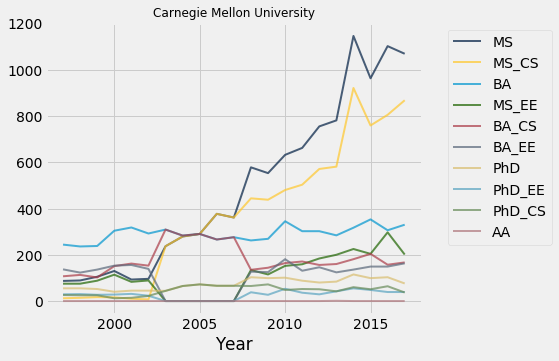

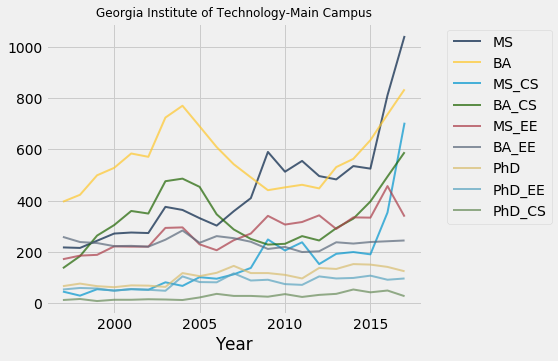

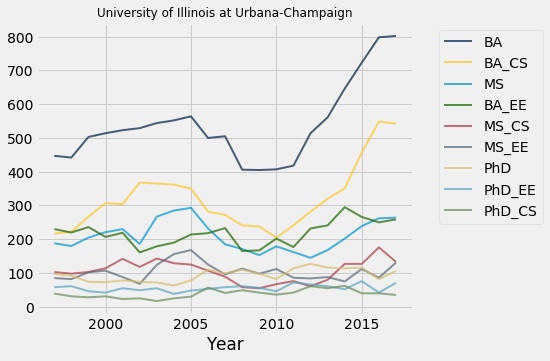

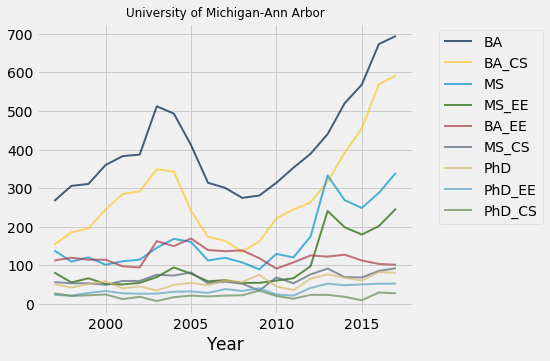

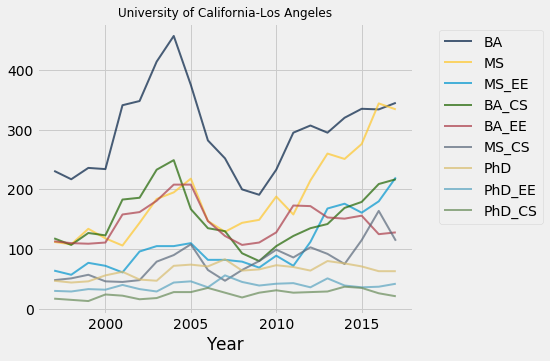

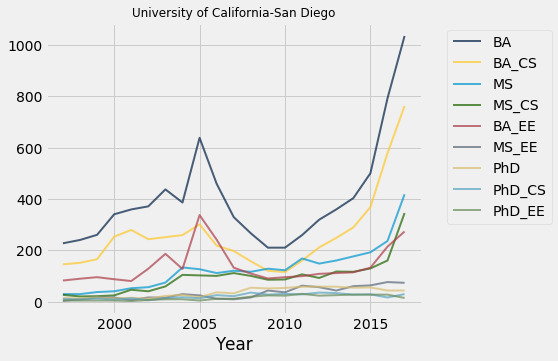

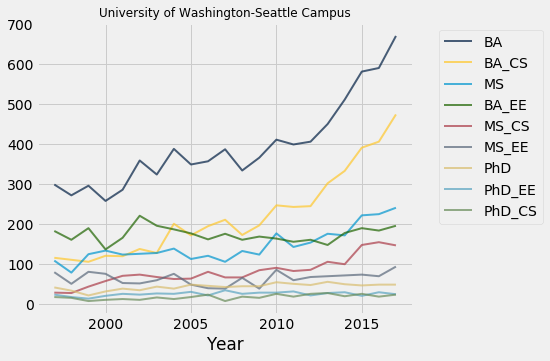

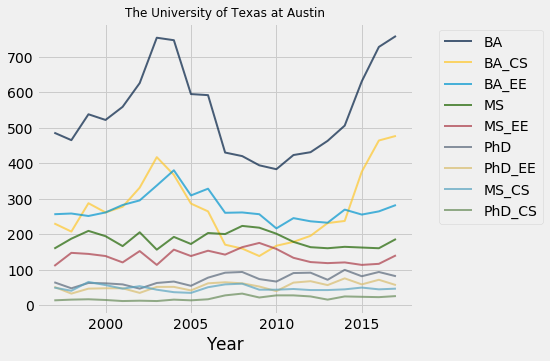

In [42]:
for inst in instlist :
    deg_plot(inst)

In [43]:
for inst in instlist :
    print(inst)
    print(deg_by_time(inst).after(2009))

University of California-Berkeley
Year | BA_CS | MS_CS | PhD_CS | BA_EE | MS_EE | PhD_EE | BA   | MS   | PhD
2009 | 73    | 25    | 35     | 266   | 31    | 44     | 339  | 56   | 79
2010 | 78    | 32    | 32     | 265   | 39    | 36     | 343  | 71   | 68
2011 | 101   | 25    | 31     | 255   | 32    | 45     | 356  | 57   | 76
2012 | 91    | 20    | 25     | 307   | 56    | 51     | 398  | 76   | 76
2013 | 149   | 27    | 33     | 328   | 44    | 39     | 477  | 71   | 72
2014 | 191   | 33    | 41     | 401   | 36    | 49     | 592  | 69   | 90
2015 | 286   | 14    | 18     | 360   | 88    | 47     | 646  | 102  | 65
2016 | 380   | 20    | 21     | 361   | 69    | 32     | 741  | 89   | 53
2017 | 501   | 20    | 29     | 391   | 63    | 39     | 892  | 83   | 68
Stanford University
Year | BA_CS | MS_CS | PhD_CS | BA_EE | MS_EE | PhD_EE | BA   | MS   | PhD
2009 | 64    | 116   | 21     | 47    | 211   | 92     | 111  | 327  | 113
2010 | 85    | 152   | 25     | 36    | 197   | 89     